In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Consumer_Discretionary.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['CalendarYear', 'KF_ID', 'RegionName', 'OwnershipTypeDesc',
       'NumOfEmpDesc', 'IndustryName', 'IndustrySectorName',
       'IndustrySegmentName', 'JobName', 'ReferenceLevelNum',
       'IncumbentPointCount', 'Base Salary', 'Benefit Values',
       'Fixed Annual Remuneration', 'Long Term Incentive Values',
       'Short Term Variable Payments', 'Target Incentive Payment (%)',
       'Total Annual Remuneration', 'Total Cash', 'Total Direct Compensation',
       'Total Remuneration Plus', 'Total Earnings'],
      dtype='object')

In [4]:
df1 = df[~df['ReferenceLevelNum'].isin([99])]

In [5]:
list2011 = df1[df1.CalendarYear == 2011]['KF_ID'].value_counts().index.sort_values(ascending = True).tolist()
list2015 = df1[df1.CalendarYear == 2015]['KF_ID'].value_counts().index.sort_values(ascending = True).tolist()
a = [x for x in list2011 if x in list2015]  # Companies existing in both 2011 and 2015
b = [y for y in (list2011 + list2015) if y not in a]  # Companies existing in either 2011 or 2015
c = [x for x in list2011 if x not in list2015] # Companies existing in 2011 but missing in 2015
d = [y for y in list2015 if y not in list2011]  # Companies missing in 2011 but existing in 2015

In [6]:
print(a) # The KF_ID of companies surveyed both in 2011 and 2015

[4, 12, 16, 17, 23, 55, 71, 108, 114, 132, 171, 223, 227, 235, 243, 251, 298, 312, 325, 366, 406, 432, 462, 482, 489, 509, 543, 592, 603, 605, 622, 632, 689, 694, 705, 738, 748, 884, 922, 951, 954, 997, 1016, 1028, 1029, 1046, 1092, 1105, 1156, 1178, 1216, 1229, 1241, 1244, 1264, 1294, 1301, 1325, 1326, 1346, 1369, 1387, 1401, 1423, 1441, 1466, 1467, 1487, 1490, 1491, 1497, 1504, 1507, 1509, 1530, 1606, 1607, 1626, 1633, 1646]


In [7]:
df2 = df1.set_index('KF_ID')
dfboth = df2.loc[a]

In [8]:
df2011 = dfboth[dfboth.CalendarYear == 2011]
df2015 = dfboth[dfboth.CalendarYear == 2015]

In [7]:
jn = dfboth['JobName'].value_counts().index.tolist()
jndic = {}
for i in jn:
    jnyear = {}
    jnyear['2011'] = np.median(df2011[df2011.JobName == i]['ReferenceLevelNum'])
    jnyear['2015'] = np.median(df2015[df2015.JobName == i]['ReferenceLevelNum'])
    jndic[i] = jnyear
dfjn = pd.DataFrame(jndic)
dfjn = dfjn.T

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This is Job list for companies existing in both 2011 and 2015. The value for each cell is ReferenceLevelNum

In [9]:
dfjn = dfjn.dropna(axis=0,how='all')  
dfjn

,2011,2015
Cashier I,NaN,7.0
Sales Assistant I,NaN,8.0
Assistant Store Manager IV - 1382,15.0,NaN
Sales Assistant II,NaN,9.0
Assistant Store Manager I,NaN,12.0
...,...,...
Executive/Management - Corporate Executives - Level 20,NaN,20.0
Health Insurance - Pharmacy -Pharmacy Benefit Management - Level 20,20.0,NaN
Human Resources - Recruitment and Organizational Development - Level 20,NaN,20.0
Finance and Accounting (FA) - Treasury (FAF) - Level 22,NaN,22.0


Dive into the job existing in comapnies for both years, we found out that the skill levels remain nearly the same

In [10]:
dfjjj = dfjn.dropna(axis=0,how='any')  
dfjjj

,2011,2015
Unclassified - Unclassified - Level 15,15.0,15.0
Unclassified - Unclassified - Level 14,14.0,14.0
Unclassified - Unclassified - Level 12,12.0,12.0
Unclassified - Unclassified - Level 16,16.0,16.0
Unclassified - Unclassified - Level 13,13.0,13.0
...,...,...
Merchandise Operations - Sourcing - Level 21,21.0,21.0
Sales - Key Account Sales - Level 22,22.0,22.0
Executive/Management - Corporate Executives - Level 26,26.0,26.0
Retail Operations - Regional Management - Level 28,28.0,28.0


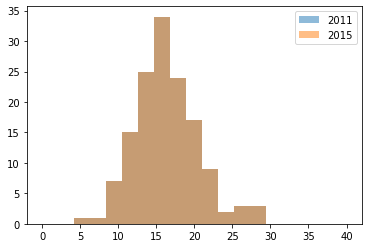

In [17]:
bins = np.linspace(0, 40, 20)

plt.hist(dfjjj['2011'], bins, alpha = 0.5, label='2011')
plt.hist(dfjjj['2015'], bins, alpha = 0.5, label='2015')
plt.legend(loc='upper right')
plt.show()

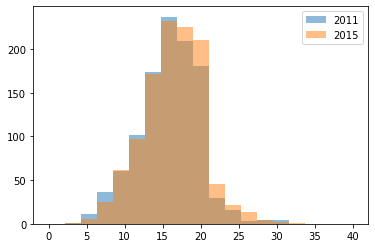

In [14]:
bins = np.linspace(0, 40, 20)

plt.hist(dfjn['2011'], bins, alpha = 0.5, label='2011')
plt.hist(dfjn['2015'], bins, alpha = 0.5, label='2015')
plt.legend(loc='upper right')
plt.show()

In [16]:
print("Median skill level for companies in 2011 which we have records in both years: %d" %np.median(df2011['ReferenceLevelNum']))
print("Median skill level for companies in 2015 which we have records in both years: %d" %np.median(df2015['ReferenceLevelNum']))

Median skill level for companies in 2011 which we have records in both years: 15
Median skill level for companies in 2015 which we have records in both years: 9


In [17]:
print("Mean skill level for companies in 2011 which we have records in both years: %f" %np.mean(df2011['ReferenceLevelNum']))
print("Mean skill level for companies in 2015 which we have records in both years: %f" %np.mean(df2015['ReferenceLevelNum']))

Mean skill level for companies in 2011 which we have records in both years: 13.908148
Mean skill level for companies in 2015 which we have records in both years: 9.611288


From above analysis, we observe that when we take median values of each job for companies for which we have records in both 2011 and 2015, the distribution of ReferenceLevelNum doesn't have big difference and ReferenceLevelNum even looks a little bit higher in 2015. But when we take all companies into consideration for both years, the median and mean values of ReferenceLevelNum for companies in 2015 are less than that in 2011 obviously. The only explanation is that there is large amount of low skilled jobs in 2015, which means an influx of low skilled labors. Also the companies surveyed changed, so we dive into specific companies to see whether there is something different.

In [18]:
print(c) # The KF_ID of companies surveyed in 2011 but not in 2015

[10, 56, 75, 82, 153, 272, 273, 276, 291, 306, 317, 319, 320, 331, 358, 374, 376, 408, 409, 417, 438, 498, 527, 552, 556, 562, 584, 588, 593, 596, 607, 608, 625, 645, 698, 714, 757, 768, 803, 805, 844, 852, 855, 931, 1003, 1022, 1025, 1052, 1071, 1072, 1095, 1096, 1112, 1119, 1144, 1253, 1257, 1272, 1278, 1295, 1305, 1323, 1333, 1335, 1338, 1349, 1402, 1424, 1430, 1437, 1439, 1448, 1468, 1473, 1505, 1537, 1561, 1568, 1593, 1597, 1634, 1635, 1649]


So we select KF_ID = 82 for analysis

In [56]:
df82 = df1[df1.KF_ID == 82].groupby('JobName')['ReferenceLevelNum'].median()

In [21]:
print(d) # The KF_ID of companies surveyed in 2015 but not in 2011

[2, 39, 49, 54, 110, 137, 149, 194, 200, 201, 250, 314, 324, 326, 330, 337, 342, 378, 435, 464, 466, 469, 472, 526, 528, 540, 563, 564, 573, 587, 636, 697, 722, 730, 736, 761, 767, 776, 783, 791, 799, 804, 808, 827, 835, 848, 851, 861, 899, 966, 970, 990, 1006, 1014, 1032, 1040, 1049, 1053, 1064, 1101, 1134, 1194, 1203, 1210, 1282, 1293, 1324, 1332, 1392, 1449, 1453, 1461, 1463, 1520, 1563, 1580, 1588, 1611, 1615, 1636, 1644, 1667]


So we select KF_ID = 39 for analysis

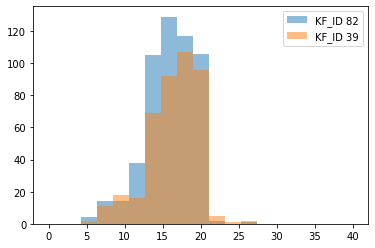

In [58]:
df39 = df1[df1.KF_ID == 39].groupby('JobName')['ReferenceLevelNum'].median()
plt.hist(df82, bins, alpha = 0.5, label='KF_ID 82')
plt.hist(df39, bins, alpha = 0.5, label='KF_ID 39')
plt.legend(loc='upper right')
plt.show()

In [59]:
len(df1[df1.CalendarYear == 2015]['JobName'].value_counts().index.tolist())

1528

In [60]:
len(df1[df1.CalendarYear == 2011]['JobName'].value_counts().index.tolist())

1196

Then we use median and mean values for companies presented either in 2011 or 2015 but not both to 
demonstrate our hypothesis.From these statistics, we observe that the amount of jobs in 2015 is much greater than
that in 2011. But at the same time, lower median/mean skill level show that the majority of jobs increasing in 2015
were low skilled jobs.

In [21]:
dfei2011 = df2.loc[c]
dfei2015 = df2.loc[d]

In [22]:
print("Median skill level for companies only in 2011: %d" %np.median(dfei2011[dfei2011.CalendarYear == 2011]['ReferenceLevelNum']))
print("Median skill level for companies only in 2015: %d" %np.median(dfei2015[dfei2015.CalendarYear == 2015]['ReferenceLevelNum']))

Median skill level for companies only in 2011: 15
Median skill level for companies only in 2015: 9


In [24]:
print("Mean skill level for companies only in 2011: %f" %np.mean(dfei2011[dfei2011.CalendarYear == 2011]['ReferenceLevelNum']))
print("Mean skill level for companies only in 2015: %f" %np.mean(dfei2015[dfei2015.CalendarYear == 2015]['ReferenceLevelNum']))

Mean skill level for companies only in 2011: 14.406466
Mean skill level for companies only in 2015: 10.332119


# Conclusion

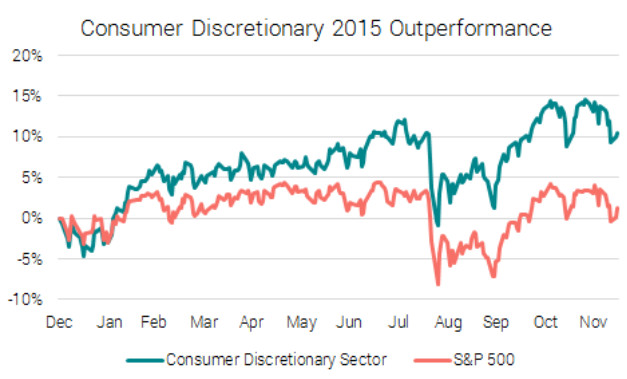

According to above analysis, we get to know that the number of jobs in 2015 is greater than that in 2011. Much of the sector's gains are likely 
the result of the fairly strong economic environment. The Bureau of Labor Statistics estimates that the U.S. economy added 211,000 jobs in 
November,2015. The unemployment rate has fallen to 5%, half the peak level it reached in late 2009 in the aftermath of the global financial 
crisis.At the same time, declining commodity prices have helped keep the inflation rate subdued. For example,the oil price in particular has 
declined dramatically since the middle of 2014, with the price of crude oil recently nearing an 11-year low. The combination of a strengthening 
jobs market and low commodity prices has helped put more money in consumers' wallets and provided a boost to companies in the consumer discretionary
sector.

So we draw a conclusion that more low skilled labor were recruited in 2015 and low price of commodities were the main reason of drop 
in base salary in 2015.